# Bike sharing Case Study


# Step 1: Reading the Data

In [352]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [353]:
#import the libraries.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [354]:
bs_df = pd.read_csv("day.csv")
bs_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [355]:
bs_df.shape

(730, 16)

In [356]:
bs_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [357]:
bs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [358]:
#Verify the null counts
bs_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [359]:
bs_df.drop(['instant', 'dteday'],axis=1,inplace=True)
bs_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [360]:
#Drop the casual, registered which is already summed as cnt. cnt is our target variable so we will not consider casual and registered
bs_df.drop(['casual','registered'],axis=1,inplace=True)

#Drop the 'atemp' already 'temp' is actual value
bs_df.drop(['atemp'],axis=1,inplace=True)
bs_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


# Data preparations

In [361]:
#Data Preparations and Value conversions
bs_df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bs_df['weathersit'].replace({1:"Clear",2:"Mist_cloudy",3:"Light snow",4:'Heavy Rain'},inplace=True)
bs_df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bs_df['yr'].replace({0:"2018",1:"2019"},inplace=True)

def month_conversion(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
                  7:'Jul', 8:'Aug', 9:'Sep',10:'Oct', 11:'Nov', 12:'Dec'})

bs_df['mnth']=bs_df[['mnth']].apply(month_conversion)

bs_df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Saturday,0,Mist_cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Sunday,0,Mist_cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600
5,spring,2018,Jan,0,Thursday,1,Clear,8.378268,51.8261,6.000868,1606
6,spring,2018,Jan,0,Friday,1,Mist_cloudy,8.057402,49.8696,11.304642,1510
7,spring,2018,Jan,0,Saturday,0,Mist_cloudy,6.765000,53.5833,17.875868,959
8,spring,2018,Jan,0,Sunday,0,Clear,5.671653,43.4167,24.250650,822
9,spring,2018,Jan,0,Monday,1,Clear,6.184153,48.2917,14.958889,1321


# Step 2: EDA Analysis

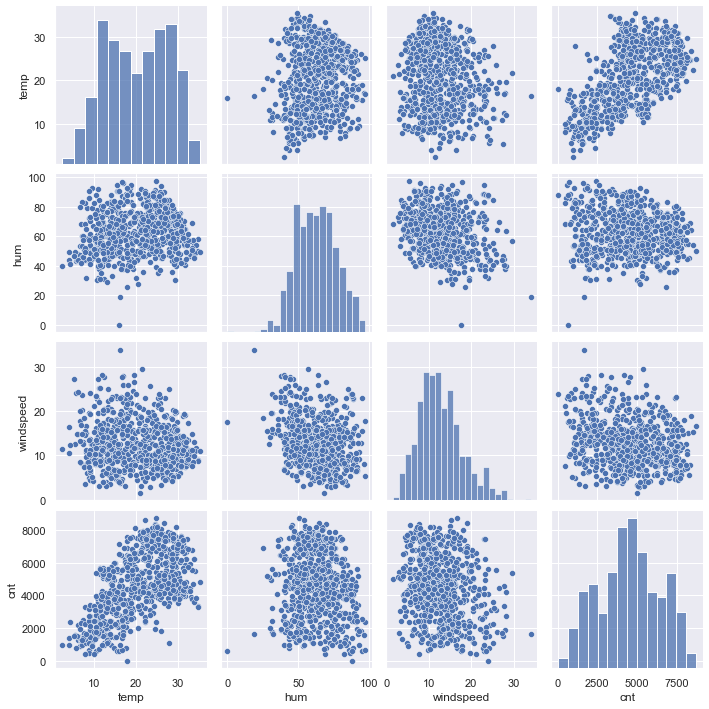

In [362]:
sns.pairplot(bs_df, vars=['temp','hum','windspeed',"cnt"])
plt.show()

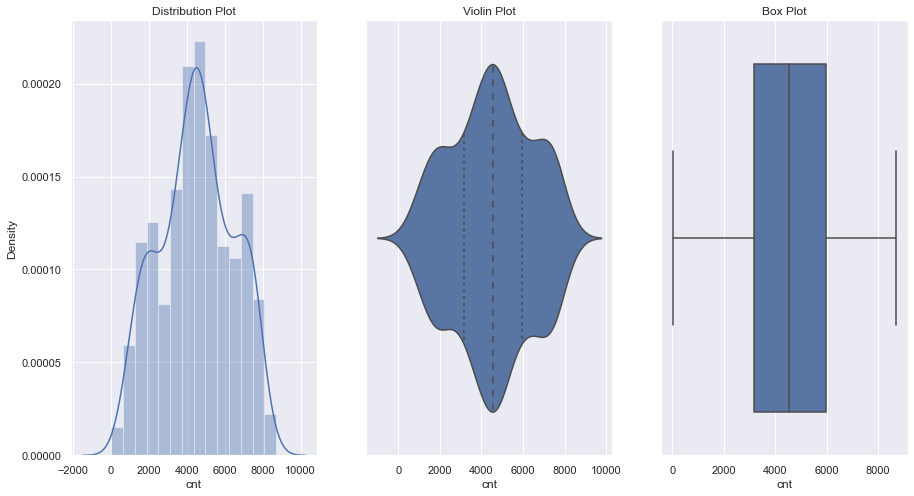

In [363]:
def univariate(df,col):
        sns.set(style="darkgrid")
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(15,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")        
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2])
        plt.show()
        
univariate(bs_df, 'cnt')        

Based on above graph 'cnt' is normally distributed between 0 to 10000, mean is ~4508

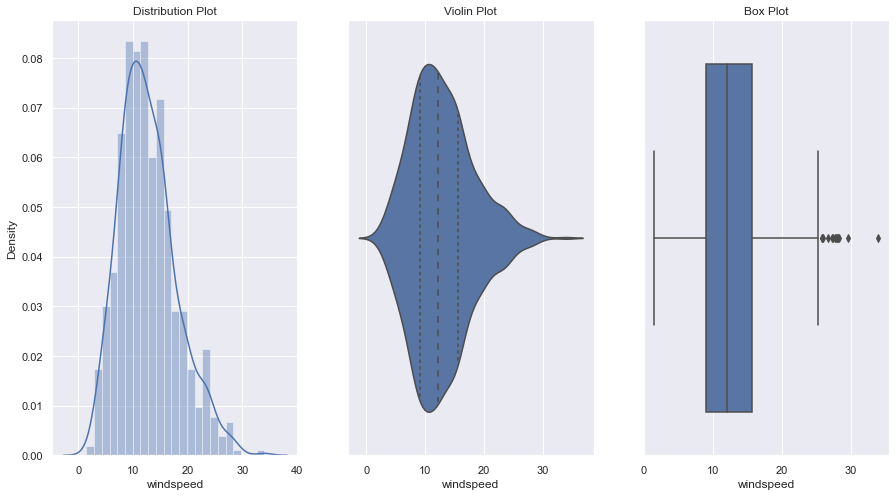

In [364]:
univariate(bs_df, 'windspeed') 

Windspeed is normally distributed between 1 to 30 with mean of ~12.76

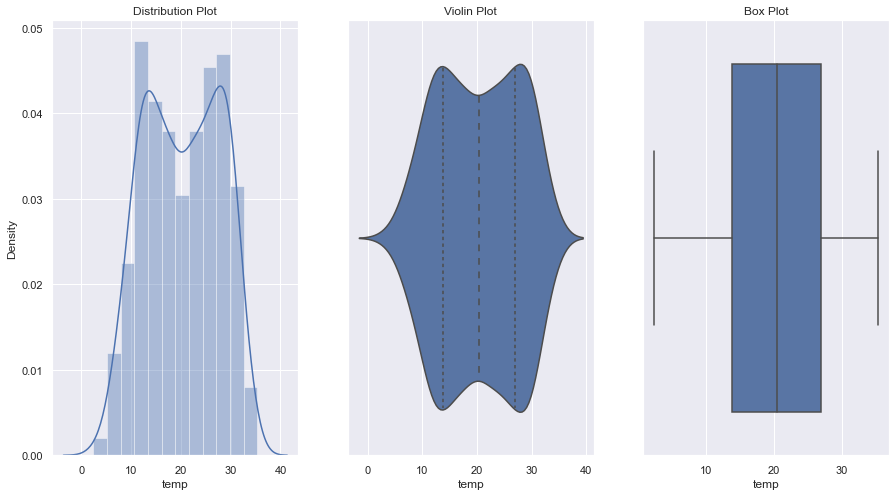

In [365]:
univariate(bs_df, 'temp') 

In [366]:
corr_col= bs_df[['temp','hum','windspeed','cnt']].corr()
corr_col.corr()

,temp,hum,windspeed,cnt
temp,1.000000,-0.089721,-0.679252,0.837192
hum,-0.089721,1.000000,-0.553687,-0.315066
windspeed,-0.679252,-0.553687,1.000000,-0.615012
cnt,0.837192,-0.315066,-0.615012,1.000000


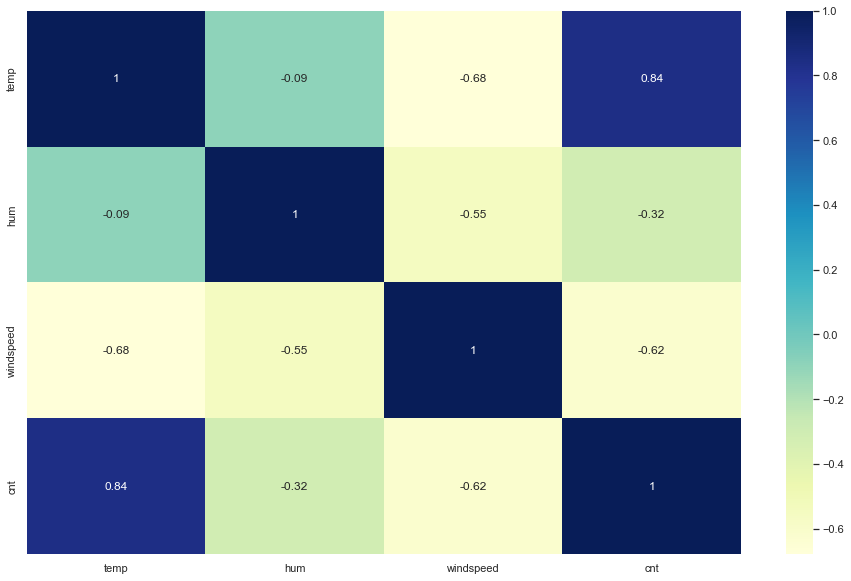

In [367]:
#Check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(corr_col.corr(), annot = True, cmap="YlGnBu")
plt.show()

By looking at the pair plot temp variable has the highest (0.84) correlation with target variable 'cnt'

## Categorical Variables analysis

In [368]:
bs_df.weathersit.value_counts()

Clear          463
Mist_cloudy    246
Light snow      21
Name: weathersit, dtype: int64

In [369]:
bs_df.yr.value_counts()

2018    365
2019    365
Name: yr, dtype: int64

In [370]:
bs_df.weekday.value_counts()

Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: weekday, dtype: int64

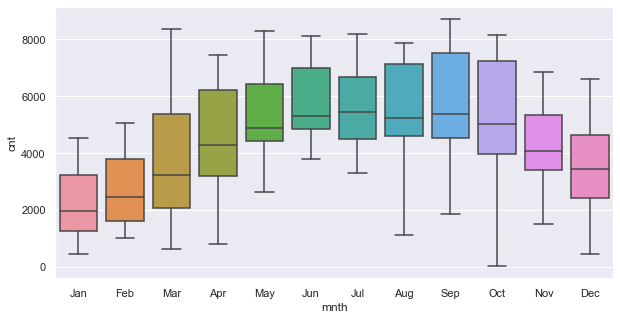

In [371]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', data = bs_df)
plt.show()

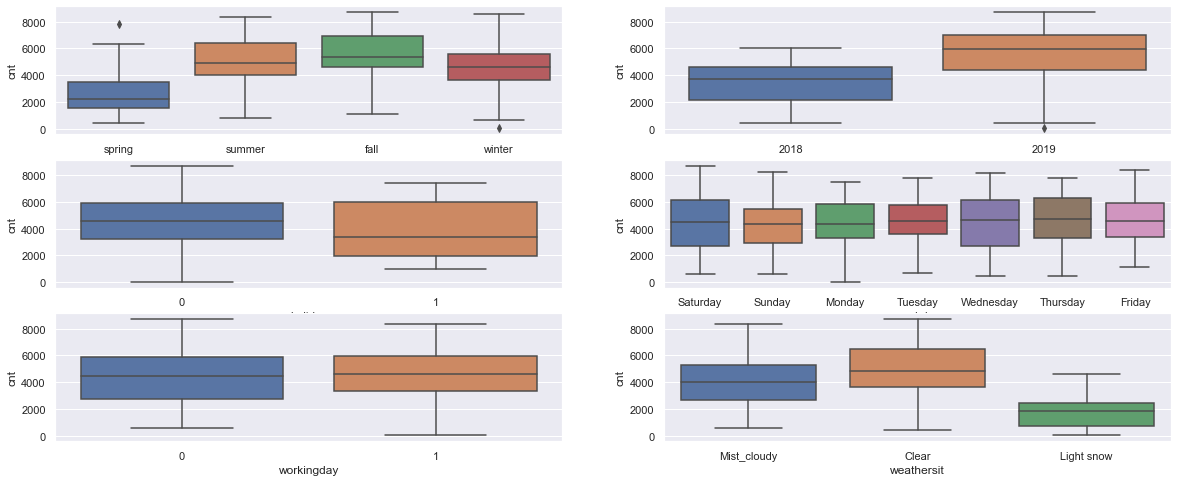

In [372]:
plt.figure(figsize=(20, 8))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bs_df)
plt.subplot(3,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bs_df)
plt.subplot(3,2,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bs_df)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bs_df)
plt.subplot(3,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bs_df)
plt.subplot(3,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bs_df)
plt.show()

As per above analysis of the categorical variables from the dataset

* he season box indicates that more bikes rented during fall season
* The year 2019 indicates that more bikes rented
* The working day & holiday box indicate that more bikes rented during normal working days than on weekends or holidays.
* The weathersit box plots indicates that more bikes are rent during Clear Sky days

#  Step 3: Creating Dummy Variables

In [373]:
bs_df=pd.get_dummies(data=bs_df, columns=['season', 'mnth','yr','weekday','weathersit'], drop_first = True)
bs_df.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Sep,yr_2019,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light snow,weathersit_Mist_cloudy
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [374]:
bs_df.shape

(730, 29)

#  Step 4: Spliting Data & Prepare Training and Test sets

In [375]:
np.random.seed(0)
bs_df_train, bs_df_test = train_test_split(bs_df, train_size = 0.7, test_size = 0.3, random_state = 100)
(bs_df_train.shape, bs_df_test.shape)

((510, 29), (219, 29))

In [376]:
#SCALING THE NUMERICAL DATA
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scale_columns=['cnt','temp','hum','windspeed']

bs_df_train[scale_columns] = scaler.fit_transform(bs_df_train[scale_columns])
bs_df_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Sep,yr_2019,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light snow,weathersit_Mist_cloudy
653,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
576,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
426,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
728,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
482,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1


In [377]:
bs_df_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Sep,yr_2019,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light snow,weathersit_Mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,...,0.080392,0.507843,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,...,0.272166,0.500429,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# # Dividing data into X and Y sets for the model building

In [378]:
y_train = bs_df_train.pop('cnt')
X_train = bs_df_train


In [379]:
X_train.shape

(510, 28)

In [380]:
y_train.shape

(510,)

# Step 5: Building a linear model

# #  This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

RFE
Recursive feature elimination

In [381]:
#USE RFE APPROACH FOR FEATURE SELECTION
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', True, 1),
 ('yr_2019', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light snow', True, 1),
 ('weathersit_Mist_cloudy', True, 1)]

In [382]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [383]:
columns = X_train.columns[rfe.support_]
columns

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Sep',
       'yr_2019', 'weekday_Saturday', 'weathersit_Light snow',
       'weathersit_Mist_cloudy'],
      dtype='object')

In [384]:
X_train_rfe = X_train[columns]

##  Building model using statsmodel, for the detailed statistics

In [385]:
#BUILDING MODEL USING STATSMODEL:

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          2.31e-191
Time:                        20:30:26   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2510      0.036      6.949      0.000       0.180       0.322
holiday                   -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday                 0.0435      0.012      3.781      0.000       0.021       0.066
temp                       0.5098      0.034     14.851      0.000       0.442       0.577
hum                       -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed                 -0.1860      0.025     -7.301      0.000      -0.236      -0.136
season_spring             -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_summer              0.0497      0.015      3.346      0.001       0.020       0.079
season_winter              0.0944      0.017      5.479      0.000       0.061       0.128
mnth_Jan                  -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_Jul                  -0.0532      0.018     -2.947      0.003      -0.089      -0.018
mnth_Sep                   0.0812      0.016      4.934      0.000       0.049       0.114
yr_2019                    0.2305      0.008     28.807      0.000       0.215       0.246
weekday_Saturday           0.0537      0.014      3.707      0.000       0.025       0.082
weathersit_Light snow     -0.2488      0.026     -9.560      0.000      -0.300      -0.198
weathersit_Mist_cloudy    -0.0578      0.010     -5.574      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [386]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.40
2,temp,17.77
1,workingday,5.31
4,windspeed,4.73
5,season_spring,4.53
7,season_winter,3.48
6,season_summer,2.84
14,weathersit_Mist_cloudy,2.29
11,yr_2019,2.09
12,weekday_Saturday,1.98


In [387]:
#COLUMN hum HAS A VERY HIGH VIF SO WE DROP IT 
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [388]:
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          7.33e-189
Time:                        20:30:28   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1737      0.031      5.525      0.000       0.112       0.235
holiday                   -0.0562      0.027     -2.058      0.040      -0.110      -0.003
workingday                 0.0465      0.012      3.983      0.000       0.024       0.069
temp                       0.4728      0.034     14.037      0.000       0.407       0.539
windspeed                 -0.1563      0.025     -6.292      0.000      -0.205      -0.107
season_spring             -0.0597      0.021     -2.861      0.004      -0.101      -0.019
season_summer              0.0434      0.015      2.890      0.004       0.014       0.073
season_winter              0.0797      0.017      4.650      0.000       0.046       0.113
mnth_Jan                  -0.0389      0.018     -2.215      0.027      -0.073      -0.004
mnth_Jul                  -0.0482      0.018     -2.635      0.009      -0.084      -0.012
mnth_Sep                   0.0753      0.017      4.522      0.000       0.043       0.108
yr_2019                    0.2344      0.008     29.019      0.000       0.218       0.250
weekday_Saturday           0.0584      0.015      3.980      0.000       0.030       0.087
weathersit_Light snow     -0.2917      0.024    -12.027      0.000      -0.339      -0.244
weathersit_Mist_cloudy    -0.0826      0.009     -9.592      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [389]:
#Check VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.07
1,workingday,5.24
3,windspeed,4.67
4,season_spring,3.08
5,season_summer,2.33
10,yr_2019,2.08
6,season_winter,1.99
11,weekday_Saturday,1.97
7,mnth_Jan,1.62
8,mnth_Jul,1.59


In [390]:
#COLUMN temp HAS A VERY HIGH VIF SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['temp'],axis=1)

In [391]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          4.04e-154
Time:                        20:30:31   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [392]:
#COLUMN mnth_Jul HAS A VERY HIGH p_value SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['mnth_Jul'],axis=1)

In [393]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     147.6
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          3.62e-155
Time:                        20:30:32   Log-Likelihood:                 425.61
No. Observations:                 510   AIC:                            -825.2
Df Residuals:                     497   BIC:                            -770.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [394]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.12
1,workingday,3.54
3,season_spring,2.68
4,season_summer,2.00
8,yr_2019,1.89
5,season_winter,1.78
9,weekday_Saturday,1.62
6,mnth_Jan,1.60
11,weathersit_Mist_cloudy,1.56
7,mnth_Sep,1.20


In [395]:
#holiday has high p-value so we drop it
X_train_rfe=X_train_rfe.drop(['holiday'],axis=1)

In [396]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          1.30e-155
Time:                        20:30:35   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [397]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.04
0,workingday,3.29
2,season_spring,2.65
3,season_summer,1.99
7,yr_2019,1.88
4,season_winter,1.73
5,mnth_Jan,1.60
8,weekday_Saturday,1.56
10,weathersit_Mist_cloudy,1.56
6,mnth_Sep,1.18


In [398]:
#windspeed has high VIF > 2.5 so we drop it
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [399]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     158.9
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          4.34e-148
Time:                        20:30:37   Log-Likelihood:                 403.55
No. Observations:                 510   AIC:                            -785.1
Df Residuals:                     499   BIC:                            -738.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [400]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,workingday,2.89
1,season_spring,2.17
6,yr_2019,1.83
2,season_summer,1.70
3,season_winter,1.59
4,mnth_Jan,1.58
9,weathersit_Mist_cloudy,1.56
7,weekday_Saturday,1.44
5,mnth_Sep,1.17
8,weathersit_Light snow,1.07


In [401]:
#ADDING temp TO SEE MODEL IMPROVES, because it reduces R-squared significantly when it got removed.
X_train_rfe['temp']=X_train['temp']
X_train_rfe.head()

,workingday,season_spring,season_summer,season_winter,mnth_Jan,mnth_Sep,yr_2019,weekday_Saturday,weathersit_Light snow,weathersit_Mist_cloudy,temp
653,1,0,0,1,0,0,1,0,0,0,0.509887
576,1,0,0,0,0,0,1,0,0,0,0.815169
426,0,1,0,0,0,0,1,1,0,1,0.442393
728,0,1,0,0,0,0,1,0,0,0,0.245101
482,0,0,1,0,0,0,1,1,0,1,0.395666


In [402]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.6
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          8.25e-182
Time:                        20:30:40   Log-Likelihood:                 486.07
No. Observations:                 510   AIC:                            -948.1
Df Residuals:                     498   BIC:                            -897.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [403]:
# mnth_Jan has high p-value, so we drop it
X_train_rfe=X_train_rfe.drop(['mnth_Jan'],axis=1)

In [404]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.5
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          1.55e-182
Time:                        20:30:42   Log-Likelihood:                 484.95
No. Observations:                 510   AIC:                            -947.9
Df Residuals:                     499   BIC:                            -901.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [405]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.72
0,workingday,4.63
5,yr_2019,2.07
6,weekday_Saturday,1.81
2,season_summer,1.74
1,season_spring,1.70
3,season_winter,1.59
8,weathersit_Mist_cloudy,1.56
4,mnth_Sep,1.23
7,weathersit_Light snow,1.07


In [406]:
# workingday has high VIF, so we drop  and check the impact
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [407]:
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     249.4
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          1.42e-178
Time:                        20:30:44   Log-Likelihood:                 472.74
No. Observations:                 510   AIC:                            -925.5
Df Residuals:                     500   BIC:                            -883.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [408]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,2.95
4,yr_2019,2.06
1,season_summer,1.63
7,weathersit_Mist_cloudy,1.54
2,season_winter,1.44
0,season_spring,1.34
3,mnth_Sep,1.22
5,weekday_Saturday,1.18
6,weathersit_Light snow,1.06


In [409]:
# weekday_Saturday has high p-value, so we drop  and check the impact
X_train_rfe=X_train_rfe.drop(['weekday_Saturday'],axis=1)

In [410]:
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.3
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          3.09e-179
Time:                        20:30:46   Log-Likelihood:                 471.38
No. Observations:                 510   AIC:                            -924.8
Df Residuals:                     501   BIC:                            -886.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [411]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,temp,2.89
4,yr_2019,2.06
1,season_summer,1.62
6,weathersit_Mist_cloudy,1.54
2,season_winter,1.42
0,season_spring,1.31
3,mnth_Sep,1.22
5,weathersit_Light snow,1.06


# The model lm9 looks good because there are no features which is >0.05 and all the features VIF is less than 3

# Step 7: Residual Analysis of the train data:

In [412]:
#Predict values
y_train_cnt = lm9.predict(X_train_rfe9)

#CALCULATING RESIDUALS
res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

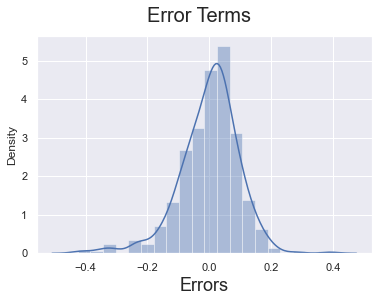

In [413]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)   

In [414]:
#Checking columns
X_train_rfe9.columns

Index(['const', 'season_spring', 'season_summer', 'season_winter', 'mnth_Sep',
       'yr_2019', 'weathersit_Light snow', 'weathersit_Mist_cloudy', 'temp'],
      dtype='object')

In [415]:
print(X_train_rfe9.shape)
print(res.shape)

(510, 9)
(510,)


# Step 8: Making predictions

In [416]:
num_vars=['temp','hum','windspeed','cnt']
bs_df_test[num_vars] = scaler.transform(bs_df_test[num_vars])
bs_df_test.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Sep,yr_2019,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light snow,weathersit_Mist_cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,-0.000136,1.809432,0.129842,145.806324,0.255708,0.264840,0.232877,0.059361,...,0.086758,0.479452,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.188034,0.459904,0.000885,0.439359,0.051368,60.920734,0.437258,0.442259,0.423633,0.236840,...,0.282125,0.500722,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,-0.002076,0.698771,0.015460,14.059253,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-0.000910,1.481350,0.092963,105.907200,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,-0.000137,1.777667,0.125381,146.833682,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000621,2.120341,0.158650,188.241464,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.001474,2.881888,0.288534,269.276220,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [417]:
#Creating x and y sets

y_test = bs_df_test.pop('cnt')
X_test = bs_df_test

In [418]:
X_train_new=X_train_rfe9.drop(['const'], axis=1)

In [419]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [420]:
#Making predictions on the chosen model

y_pred = lm9.predict(X_test_new)

Text(0, 0.5, 'y_pred')

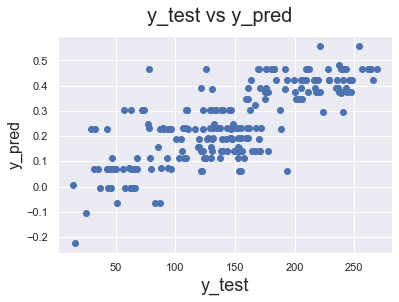

In [421]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

## We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

We can see that the equation of our best fitted line is:


# # R-squared score

In [344]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [345]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.10554045852149896

In [346]:
#Calculate the r square for test
r_squared = r2_score(y_test, y_pred)
r_squared

0.8036122431598048

In [348]:
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.3
Date:                Tue, 15 Mar 2022   Prob (F-statistic):          3.09e-179
Time:                        10:56:13   Log-Likelihood:                 471.38
No. Observations:                 510   AIC:                            -924.8
Df Residuals:                     501   BIC:                            -886.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

# Significant variables to predict the demand for shared bikes
* temp
* yr_2019
* Season(Spring,Summer,Winter)
* months(September)
* weathersit( Light Snow, Mist Cloudy)